In [192]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings(action = "ignore")

In [193]:
data = pd.read_csv("Chennai house data.csv")
data

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [194]:
data = data.drop(columns = "bathroom")

In [195]:
data.isnull().sum()

price         0
area          0
status        0
bhk           0
age         891
location      0
builder       0
dtype: int64

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       1729 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


# Missing Values

In [197]:
sum(data['age'].unique())

nan

In [198]:
data['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       1729 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


In [200]:
data["age"]

0       1.0
1       NaN
2       0.0
3       3.0
4       0.0
       ... 
2615    3.0
2616    3.0
2617    3.0
2618    3.0
2619    3.0
Name: age, Length: 2620, dtype: float64

In [201]:
data['age'].fillna((data['age'].median()), inplace = True)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   age       2620 non-null   float64
 5   location  2620 non-null   object 
 6   builder   2620 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 143.4+ KB


In [203]:
len(data['location'].unique())

178

In [204]:
data['age'].fillna((data['age'].median()), inplace = True)

In [205]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [206]:
data["price"].max()

1422.0

# Outliers

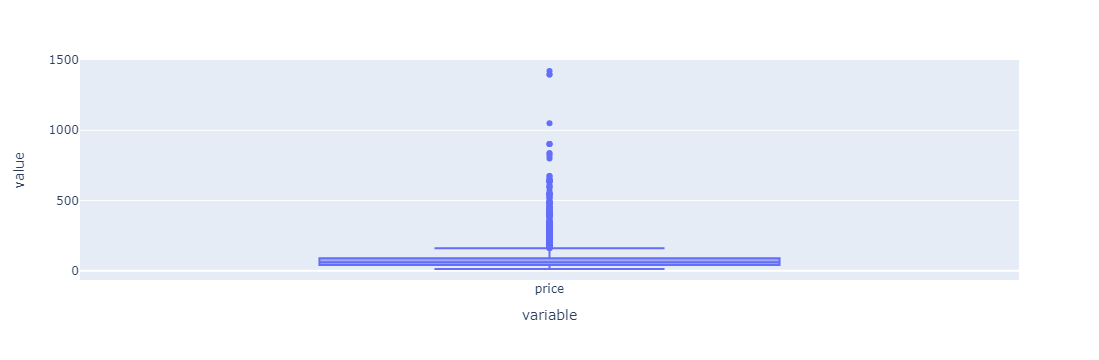

In [207]:
px.box(data['price'])

In [208]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['price'] = np.where(data['price'] > ubound, ubound,np.where(data['price'] < lbound, lbound, data['price']))


42.0 90.0 48.0
-30.0 162.0


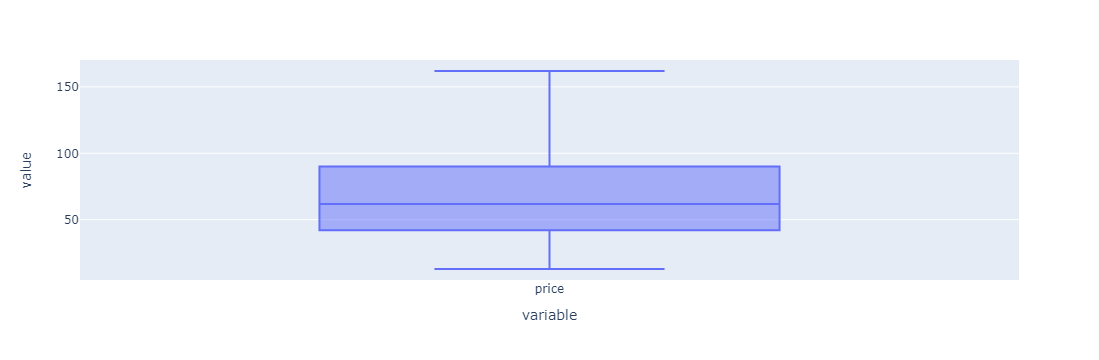

In [209]:

px.box(data['price'])

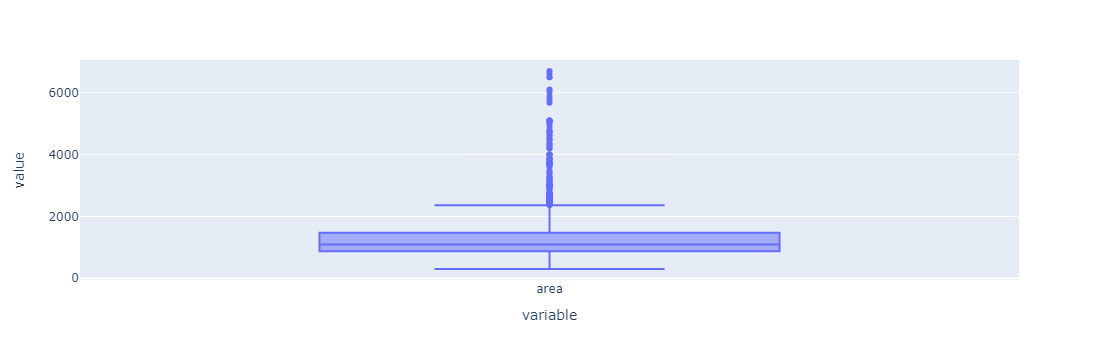

In [210]:
px.box(data['area'])

877.0 1471.25 594.25
-14.375 2362.625


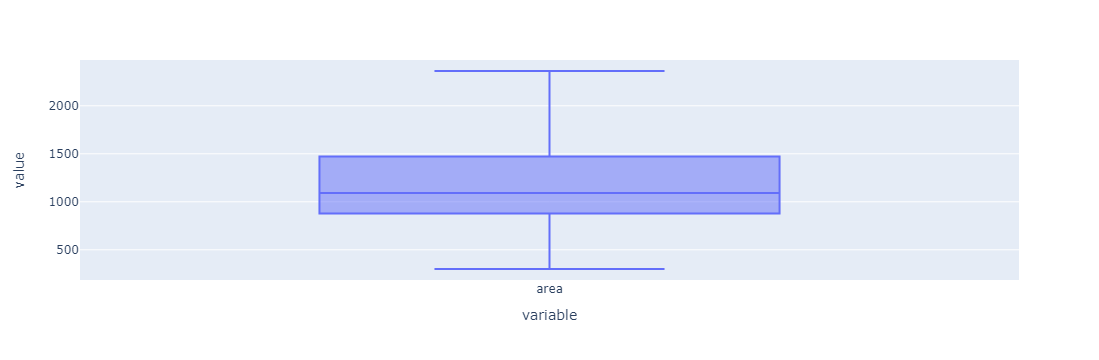

In [211]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['area'] = np.where(data['area'] > ubound, ubound, 
                        np.where(data['area'] < lbound, lbound, data['area']))
px.box(data['area'])

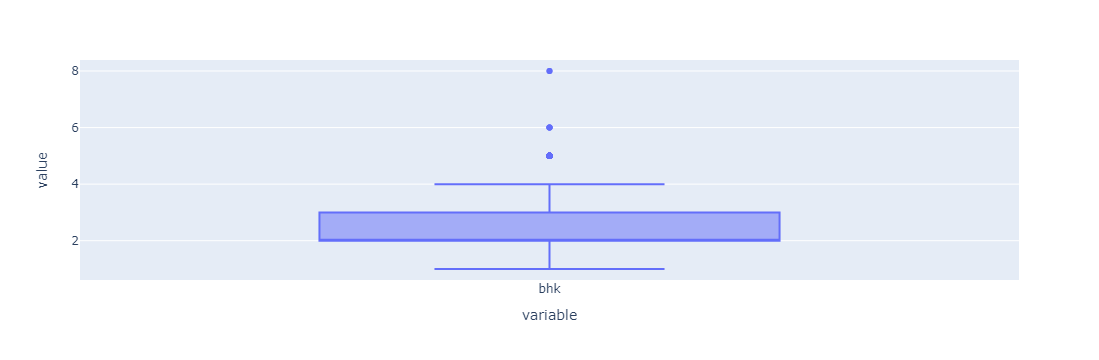

In [212]:
px.box(data['bhk'])

2.0 3.0 1.0
0.5 4.5


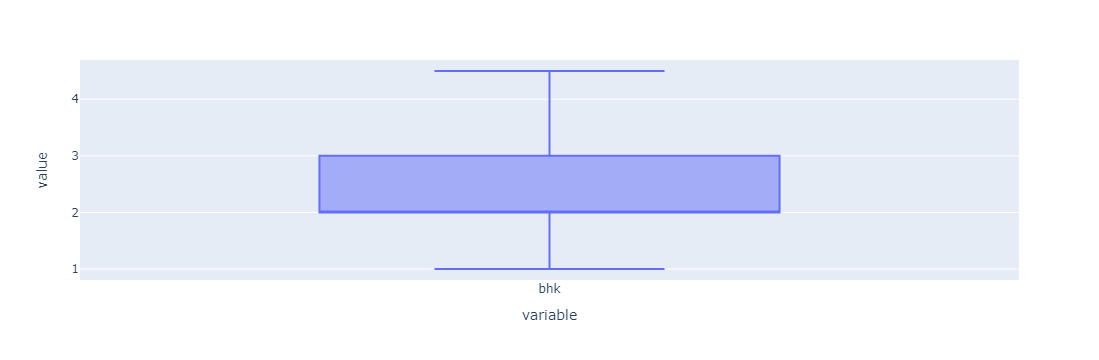

In [213]:
Q1 = data['bhk'].quantile(0.25)
Q3 = data['bhk'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['bhk'] = np.where(data['bhk'] > ubound, ubound, 
                        np.where(data['bhk'] < lbound, lbound, data['bhk']))
px.box(data['bhk'])

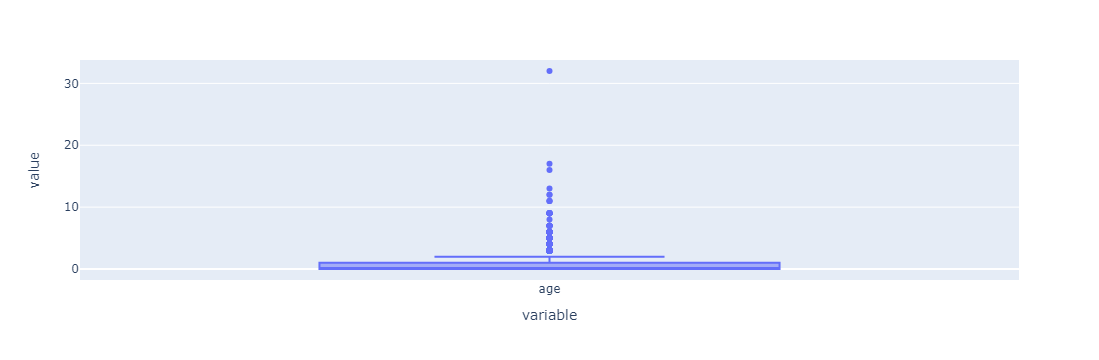

In [214]:
px.box(data['age'])

0.0 1.0 1.0
-1.5 2.5


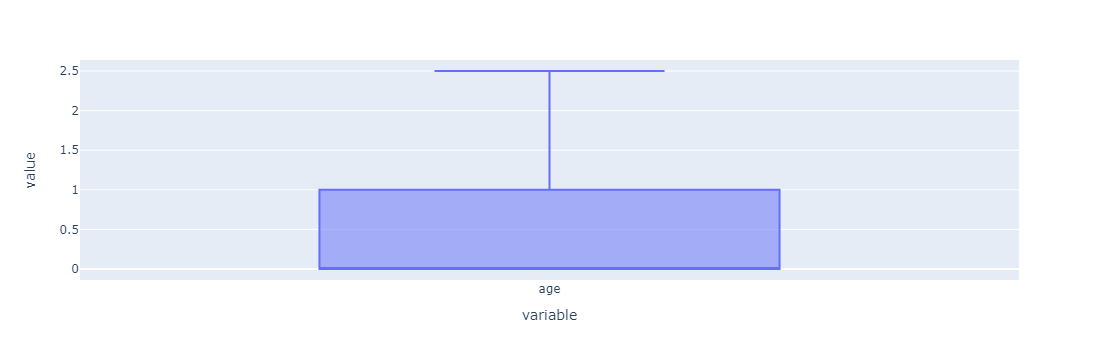

In [215]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['age'] = np.where(data['age'] > ubound, ubound, 
                        np.where(data['age'] < lbound, lbound, data['age']))
px.box(data['age'])

In [216]:
location = data["location"]
builder = data["builder"]
status = data["status"]

# label Encoding

In [217]:
from sklearn.preprocessing import LabelEncoder 
status_encoder = LabelEncoder()
location_encoder = LabelEncoder()
builder_encoder = LabelEncoder()

data["location"] = location_encoder.fit_transform(data["location"])
data["builder"] = builder_encoder.fit_transform(data["builder"])
data["status"] = status_encoder.fit_transform(data["status"])
data.head()

,price,area,status,bhk,age,location,builder
0,37.49,872.0,0,2.0,1.0,137,60
1,93.54,1346.0,1,3.0,0.0,136,20
2,151.00,2225.0,1,3.0,0.0,82,18
3,49.00,1028.0,0,2.0,2.5,5,26
4,42.28,588.0,1,2.0,0.0,105,88


In [218]:
location = pd.DataFrame(location,data["location"])
location

,location
location,
137,Madhavaram
136,Mogappair
82,Guindy
5,Virugambakkam
105,Chromepet
...,...
171,Kundrathur
171,Kundrathur
171,Kundrathur


In [219]:
value = location.loc[123]
value

,location
location,
123,Selaiyur
123,Selaiyur


In [220]:
builder = pd.DataFrame(builder ,data["builder"])
builder 

,builder
builder,
60,Prestige Estates Projects Ltd
20,PS Srijan Developers
18,Appaswamy Real Estate
26,EK Realtors
88,Doshi Housing
...,...
122,DAC Promoters
122,DAC Promoters
122,DAC Promoters


In [221]:
status = pd.DataFrame(status ,data["status"])
status

,status
status,
0,Ready to move
1,Under Construction
1,Under Construction
0,Ready to move
1,Under Construction
...,...
0,Ready to move
0,Ready to move
0,Ready to move


In [222]:
data.head()

,price,area,status,bhk,age,location,builder
0,37.49,872.0,0,2.0,1.0,137,60
1,93.54,1346.0,1,3.0,0.0,136,20
2,151.00,2225.0,1,3.0,0.0,82,18
3,49.00,1028.0,0,2.0,2.5,5,26
4,42.28,588.0,1,2.0,0.0,105,88


# Splitting data

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['price']
X = scaler.fit_transform(data.drop(columns = ['price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['price']).columns)
X.head()


,area,status,bhk,age,location,builder
0,-0.729629,-0.87289,-0.566140,0.401067,0.768583,-0.233426
1,0.248971,1.14562,0.762375,-0.608343,0.748789,-1.127770
2,2.063716,1.14562,0.762375,-0.608343,-0.320079,-1.172488
3,-0.407558,-0.87289,-0.566140,1.915181,-1.844205,-0.993619
4,-1.315963,1.14562,-0.566140,-0.608343,0.135180,0.392616


In [224]:
X.min()

area       -1.910555
status     -0.872890
bhk        -1.894655
age        -0.608343
location   -1.943175
builder    -1.574943
dtype: float64

In [225]:
X.max()

area        2.347850
status      1.145620
bhk         2.755148
age         1.915181
location    1.560337
builder     1.421112
dtype: float64

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


    feature       VIF
0      area  3.413334
1    status  1.442710
2       bhk  3.421690
3       age  1.417218
4  location  1.009604
5   builder  1.037012


# XGboost Regreesion

In [227]:
from xgboost import  XGBRegressor

Y = data['price']
X = data.drop(columns=['price'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

from sklearn.linear_model import Ridge 

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.1, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
lr = LinearRegression()
lrboost2 = XGBRegressor()
lrboost2.fit(x_train, y_train)

# Make predictions
predictions5 = lrboost2.predict(x_test)

# Calculate accuracy
acc4 = lrboost2.score(x_test, y_test) * 100


(2358, 6) (262, 6) (2358,) (262,)


In [228]:
specific = [[872, 0, 2.0, 1.0, 137, 60]]

specific_scaled = scaler.transform(specific)
result5 = lrboost2.predict(specific_scaled)
print("XG boost algorithm algorithm result", result5)


# Calculate evaluation metrics
mae4 = mean_absolute_error(y_true=y_test, y_pred=predictions5)
mse4 = mean_squared_error(y_true=y_test, y_pred=predictions5)
rmse4 = mean_squared_error(y_true=y_test, y_pred=predictions5, squared=False)

# Print evaluation metrics
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("Accuracy:", acc4)


XG boost algorithm algorithm result [48.53693]
MAE: 5.208642689071539
MSE: 86.35318407601824
RMSE: 9.292641393921226
Accuracy: 94.94597086323725


In [229]:

specific_scaled = scaler.transform(specific)
result5 = lrboost2.predict(specific_scaled)
print("XG boost algorithm algorithm result", result5)


# Calculate evaluation metrics
mae4 = mean_absolute_error(y_true=y_test, y_pred=predictions5)
mse4 = mean_squared_error(y_true=y_test, y_pred=predictions5)
rmse4 = mean_squared_error(y_true=y_test, y_pred=predictions5, squared=False)

# Print evaluation metrics
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("Accuracy:", acc4)


XG boost algorithm algorithm result [48.53693]
MAE: 5.208642689071539
MSE: 86.35318407601824
RMSE: 9.292641393921226
Accuracy: 94.94597086323725


# file

In [230]:
pickle_m = 'C:\\Users\\HP\\machine Learning\\regression\\chennaihouse-copy1.pkl'

with open(pickle_m, "wb") as file:
    pickle.dump((scaler, lrboost2), file)

NameError: name 'pickle' is not defined

In [ ]:
with open(pickle_m, "rb") as file:
    loaded_scaler, load_model = pickle.load(file)

In [ ]:
sample_input = [[872, 0, 2.0, 1.0, 137, 60]]
sample_input_scaled = loaded_scaler.transform(sample_input)

In [ ]:
load_model.predict(sample_input_scaled)